<a href="https://colab.research.google.com/github/zilavalencia/ChungaraVZila-IA-SIS420/blob/main/Laboratorios/Laboratorio01/Laboratorio_1_Regresion_Multiple_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 1
# Ejercicio Regresión Lineal Multiple
Integrantes:

*   Portillo Mercado Daniela
*   Chungara Valencia Zila
*   Escobar Ruiz Marco Antonio
*   Gómez García Flores Dafne July
*   Gutiérrez Murillo Gerson (Jefe de Grupo)

Asignatura: Inteligencia Artificial I (SIS420)

Colab: https://colab.research.google.com/drive/1w8HJKQs0HJPMLppb9FgSMprrSFEx2XCX#scrollTo=OxH1TtBiZ7Qg

Dataset: https://www.kaggle.com/datasets/oliverquiros/enfermedades-del-corazon/data

Github: https://github.com/zilavalencia/ZChungaraValencia-IA-SIS420


# ***Variables del dataset sobre enfermedades cardíacas***

**X1: age(edad)** = Edad del paciente en años.

**X2: sex(sexo)** = Género biológico del paciente.
0. hombre
1. mujer

**X3: chest pain type(tipo de dolor en el pecho)** = Clasificación del dolor torácico. Útil para diagnosticar posibles problemas cardíacos.
1. Angina típica (dolor por el esfuerzo físico).

2. Angina atípica (dolor no relacionado con esfuerzo).

3. Dolor no anginoso (probablemente no relacionado con el corazón).

4. Asintomático (sin dolor en el pecho).

**X4: resting bp s(presión arterial en reposo)** = Presión arterial sistólica (mmHg).Medida cuando el paciente está en reposo.

**X5:cholesterol(colesterol)** = Nivel de colesterol sérico en mg/dL.
Un colesterol alto puede aumentar el riesgo de enfermedades cardíacas.

**X6: fasting blood sugar(glucosa en ayunas)** = Nivel de azúcar en sangre después de ayunar.Puede indicar diabetes o prediabetes, lo que afecta la salud del corazón.
0. < 120 mg/dL (normal).
1. ≥ 120 mg/dL (alto).
**X7: resting ecg(ECG en reposo)** = Resultado del electrocardiograma en reposo.
Un valor bajo puede indicar problemas en la función cardíaca.

0. Normal.

1. Anomalía en la onda ST-T.

2. Hipertrofia ventricular izquierda (signo de posible enfermedad cardíaca).

**X8: max heart rate(frecuencia cardíaca máxima alcanzada)** = Máximo de latidos por minuto durante una prueba de esfuerzo.


**X9: exercise angina(angina inducida por ejercicio)** = Dolor en el pecho al hacer ejercicio.Puede indicar obstrucciones en las arterias.
0. No
1. Si

**X10: oldpeak(depresión del ST inducida por ejercicio)** = Diferencia entre el ST en reposo y después del ejercicio.Un valor alto puede ser una señal de enfermedad cardíaca

**X11: ST slope(pendiente del segmento ST)** = Comportamiento del segmento ST en el ECG durante el ejercicio.
1. Ascendente (normal).

2. Plana (puede indicar isquemia).

3. Descendente (alto riesgo de enfermedad cardíaca).

**Y: target(objetivo / diagnóstico de enfermedad cardíaca)** → Indica si el paciente tiene o no enfermedad cardíaca.
0. No tiene enfermedad cardíaca.

1. Tiene enfermedad cardíaca.

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
#libreria pandas para leer datasets csv
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

pd.set_option('display.max_rows', 100)

# Se otorga permisos de acceso a la carpeta de Drive para leer el dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Regresión lineal con multiples variables
Se implementa la regresión lineal multiple para predecir la presencia de una enfermedad del corazon usando variables como:
edad, sexo, tipo de dolor en el pecho, presión arterial, colesterol,zucar en sangre,ECG en reposo, frecuencia cardiaca,angina de ejercicio,old peak(pico viejo), pendiente ST.


# 1. Cargando datos del dataset
Cargamos los datos haciendo el uso de la libreria PANDA.
En esta parte del codigo, se esta realizando varias operaciones relacionadas con la carga y manipulacion de datos.



In [ ]:
import pandas as pd
import numpy as np

# Cargar el dataset
#dataset sobre registro de estadísticas del corazón de Cleveland Hungría
#https://www.kaggle.com/datasets/oliverquiros/enfermedades-del-corazon/data
data = pd.read_csv('/content/drive/MyDrive/heart_statlog_cleveland_hungary_final.csv', delimiter=',')

# Extraer solo las primeras 11 columnas para X
X = data.iloc[:, :11].values  # leer las 11 primeras columnas
y = data.iloc[:, 11].values   # leer Última columna

# Número de muestras
m = y.size
print("Número de muestras:", m)

# Imprimir encabezados alineados
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
    'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11','Y'))
#x1= edad,x2= sexo,x3= tipo de dolor en el pecho,x4= presión arterial en reposo, x5= colesterol, x6= azúcar en sangre en ayunas,x7= ECG en reposo,
#x8= frecuencia cardíaca máxima, x9= angina de ejercicio, x10= pico antiguo, x11= pendiente St , y = objetivo
print('-' * 100)

# Mostrar los primeros 10 datos formateados
for i in range(10):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}'.format(
        X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], X[i, 9],X[i, 9], y[i]))

Número de muestras: 1190
      X1      X2      X3      X4      X5      X6      X7      X8      X9     X10     X11       Y
----------------------------------------------------------------------------------------------------
      40       1       2     140     289       0       0     172       0       0       0       0
      49       0       3     160     180       0       0     156       0       1       1       1
      37       1       2     130     283       0       1      98       0       0       0       0
      48       0       4     138     214       0       0     108       1       2       2       1
      54       1       3     150     195       0       0     122       0       0       0       0
      39       1       3     120     339       0       0     170       0       0       0       0
      45       0       2     130     237       0       0     170       0       0       0       0
      54       1       2     110     208       0       0     142       0       0       0       0
 

# 1.1 Normalizacion de caracteristicas
Este proceso se usa para asegurar que todas las características tengan una escala similar.
Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [ ]:
def  featureNormalize(X):

    X_norm = X.copy() #Copia datos para no modificar el original
    mu = np.zeros(X.shape[1]) #inicializa vectores para la media y desviacion estandar
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)#calcula media y desviacion estandar
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma #normaliza cada caracteristica restando la media y dividiendo por la desvicion estandar

    return X_norm, mu, sigma

Se imprime los valores normalizados de las características. Asimismo los valores medios y la desviación estandar utilizados para la normalización de datos.

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X) #llama a la funcion la cual devuelve la matriz de datos normalizada

print(np.round(X, 2))
print('Media calculada:', mu) #imprime la media
print('Desviación estandar calculada:', sigma) #imprime desviacion estandar
print(X_norm) # normalizados que ahora tienen media 0 y desviacion estandar 1 asegurando que todas las caracte. esten en las misma escala

[[40.   1.   2.  ...  0.   0.   1. ]
 [49.   0.   3.  ...  0.   1.   2. ]
 [37.   1.   2.  ...  0.   0.   1. ]
 ...
 [57.   1.   4.  ...  1.   1.2  2. ]
 [57.   0.   2.  ...  0.   0.   2. ]
 [38.   1.   3.  ...  0.   0.   1. ]]
Media calculada: [ 53.72016807   0.76386555   3.23277311 132.15378151 210.36386555
   0.21344538   0.69831933 139.73277311   0.38739496   0.92277311
   1.62436975]
Desviación estandar calculada: [  9.35426995   0.42470575   0.93508722  18.3611038  101.37786644
   0.40973949   0.86999306  25.5069116    0.48715511   1.08588068
   0.61020266]
[[-1.46672783  0.55599543 -1.31835093 ... -0.79521891 -0.84979236
  -1.02321701]
 [-0.50460037 -1.79857595 -0.24893198 ... -0.79521891  0.07111913
   0.61558278]
 [-1.78743698  0.55599543 -1.31835093 ... -0.79521891 -0.84979236
  -1.02321701]
 ...
 [ 0.35062404  0.55599543  0.82048698 ...  1.25751537  0.25530143
   0.61558278]
 [ 0.35062404 -1.79857595 -1.31835093 ... -0.79521891 -0.84979236
   0.61558278]
 [-1.68053393  0.555

# Despues de normalizar, se agrega la característica X0 = 1 para todos los ejemplos.


In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -1.46672783  0.55599543 ... -0.79521891 -0.84979236
  -1.02321701]
 [ 1.         -0.50460037 -1.79857595 ... -0.79521891  0.07111913
   0.61558278]
 [ 1.         -1.78743698  0.55599543 ... -0.79521891 -0.84979236
  -1.02321701]
 ...
 [ 1.          0.35062404  0.55599543 ...  1.25751537  0.25530143
   0.61558278]
 [ 1.          0.35062404 -1.79857595 ... -0.79521891 -0.84979236
   0.61558278]
 [ 1.         -1.68053393  0.55599543 ... -0.79521891 -0.84979236
  -1.02321701]]


# 1.2 Descenso por el gradiente
El descenso por el gradiente es un algoritmo de optimización utilizado en el aprendizaje automático para minimizar una función de costo. Funciona ajustando iterativamente los parámetros en la dirección que más reduce el valor de la función de costo, calculando la derivada parcial de la función de costo con respecto a cada parámetro y actualizando los parámetros en la dirección opuesta a la derivada. Este proceso se repite hasta que se alcanza un mínimo de la función de costo o se alcanza un número máximo de iteraciones. El tamaño del paso de cada actualización, conocido como tasa de aprendizaje, es un hiperparámetro importante que afecta la convergencia y estabilidad del algoritmo. El descenso por el gradiente es fundamental en el aprendizaje automático y se utiliza en una variedad de algoritmos para entrenar modelos.



# 1.2.1 Cálculo de la función de costo J

La funcion en costo es una medida de que tan bien esta funcionando el modelo. El objetivo es minimizar esta funcion de costo para encontrar los mejores valores para los parametros theta.

In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # hipotesis o y predicha
    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

La funcion grandientDescentMulti es una implementación estandar de descenso por el gradiente para regresion lineal multivariable. El descenso por el gradiente se utiliza para encontrar los valores optimos de los parametros theta que minimzan la funcion de costo.

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

# 1.3 Seleccionando coheficientes de aprendizaje

theta calculado por el descenso por el gradiente: [ 0.50233434  0.02203683  0.07902797  0.10735295  0.0139645  -0.03982261
  0.04698833  0.01492123 -0.0538      0.08681191  0.06293846  0.105018  ]
La probabilidad de que esta persona tenga la enfermedad del corazón (usando el descenso por el gradiente) es de: 0.33


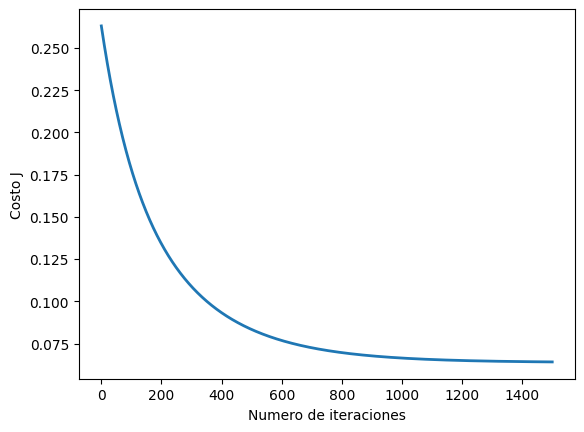

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.002 # alpha = 0.003
num_iters = 1500

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
# predicion con una persona con datos de edad=45,sexo=1,tipo de dolor en el pecho=1,presión arterial en reposo=140,colesterol=280, azúcar en sangre en ayunas =0,ECG en reposo= 0,
#frecuencia cardíaca máxima = 112, angina de ejercicio = 1, oldpeak = 0 ,  pendiente St =0
X_array = np.array([1, 45, 1, 2, 140, 280, 0, 0, 112, 1, 0, 0] )  # 12 valores
#Ejemplo 1
# Normalizar las características (sin afectar la columna de intersección)
X_array[1:12] = (X_array[1:12] - mu) / sigma
proba = np.dot(X_array, theta)
# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
print('La probabilidad de que esta persona tenga la enfermedad del corazón (usando el descenso por el gradiente) es de: {:.2f}'.format(proba))

In [ ]:
# Ejemplo 2:
# Predicion con una persona con datos de edad=20,sexo=1,tipo de dolor en el pecho=2,presión arterial en reposo=2,colesterol=250, azúcar en sangre en ayunas =0,ECG en reposo= 0,
#frecuencia cardíaca máxima = 99, angina de ejercicio = 1, oldpeak = 0 ,  pendiente St =0
X_array = np.array([1, 20, 1, 2, 160, 250, 0, 0, 99, 1, 0, 0] )  # 12 valores
# Normalizar las características (sin afectar la columna de intersección)
X_array[1:12] = (X_array[1:12] - mu) / sigma
# Verifica la forma de X_array
print("X_array normalizado:", X_array)
# Realizar la predicción
proba = np.dot(X_array, theta)  # Predicción usando el modelo entrenado
# Imprimir el resultado
print('La probabilidad de que esta persona tenga la enfermedad del corazón (usando el descenso por el gradiente) es de: {:.2f}'.format(proba))

X_array normalizado: [ 1 -3  0 -1  1  0  0  0 -1  1  0 -2]
La probabilidad de que esta persona tenga la enfermedad del corazón (usando el descenso por el gradiente) es de: 0.27


In [ ]:
# Ejemplo 3:
# Predicion con una persona con datos de edad=20,sexo=0,tipo de dolor en el pecho=2,presión arterial en reposo=175,colesterol=250, azúcar en sangre en ayunas =0,ECG en reposo= 0,
#frecuencia cardíaca máxima = 150, angina de ejercicio = 1, oldpeak = 0 ,  pendiente St =0
X_array = np.array([1, 62, 0, 2, 175, 290, 0, 0, 150, 1, 0, 0] )  # 12 valores
# Normalizar las características (sin afectar la columna de intersección)
X_array[1:12] = (X_array[1:12] - mu) / sigma
# Verifica la forma de X_array
print("X_array normalizado:", X_array)
# Realizar la predicción
proba = np.dot(X_array, theta)  # Predicción usando el modelo entrenado
# Imprimir el resultado
print('La probabilidad de que esta persona tenga la enfermedad del corazón (usando el descenso por el gradiente) es de: {:.2f}'.format(proba))

X_array normalizado: [ 1  0 -1 -1  2  0  0  0  0  1  0 -2]
La probabilidad de que esta persona tenga la enfermedad del corazón (usando el descenso por el gradiente) es de: 0.22


# Ecuacion de la Normal

La Ecuación de la Normal es una fórmula matemática utilizada en regresión lineal para calcular los parámetros del modelo que minimizan el error cuadrático entre las predicciones y los valores reales. Se utiliza principalmente cuando se quiere obtener una solución exacta y rápida para conjuntos de datos no demasiado grandes.

In [ ]:
# Cargar el dataset (sin la columna de sexo, que es la primera columna)
data = pd.read_csv('/content/drive/MyDrive/heart_statlog_cleveland_hungary_final.csv', delimiter=',')

# Excluir la primera columna (sexo) y tomar las columnas restantes como características (X)
X = data.iloc[:, :11].values  # Excluimos la primera columna (sexo) y tomamos las siguientes 9
y = data.iloc[:, 11].values   # Última columna, que es el valor objetivo

# Número de muestras
m = y.size
print("Número de muestras:", m)

X = np.concatenate([np.ones((m, 1)), X], axis=1)


Número de muestras: 1190


In [ ]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [ ]:
# Calcula los parámetros usando la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados obtenidos de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal:', theta)

# Predicion con una persona con datos de edad=55,sexo=0,tipo de dolor en el pecho=2,presión arterial en reposo=175,colesterol=290, azúcar en sangre en ayunas =1,ECG en reposo= 0,
#frecuencia cardíaca máxima = 150, angina de ejercicio = 1, oldpeak = 0 ,  pendiente St =0
X_array = [1, 55, 0, 2, 175, 290, 1, 0, 150, 1, 0, 0]  # 1 para el término de intersección y 11 características más
# Normaliza las características (usando mu y sigma calculados previamente)
#X_array[1:12] = (X_array[1:12] - mu) / sigma

# Realiza la predicción
proba = np.dot(X_array, theta)

# Imprimir el resultado de la predicción
print('La probabilidad de que esta persona tenga la enfermedad del corazón (usando la ecuación de la normal) es de: {:.2f}'.format(proba))

Theta calculado a partir de la ecuación de la normal: [-0.34422534  0.00225516  0.19165873  0.12000105  0.00085665 -0.00038595
  0.1152185   0.01716923 -0.00189561  0.17465109  0.05334132  0.18266066]
La probabilidad de que esta persona tenga la enfermedad del corazón (usando la ecuación de la normal) es de: 0.06
